# <center><font color="pink">**Import CSV**</font></center>

In [ ]:
# Memanggil library yg diperlukan
import pandas as pd
# Menyimpan path dari file data ke dalam variabel dataset
dataset = "/content/dataset.csv"
# Membaca File CSV ke DataFrame
df = pd.read_csv(dataset, sep=',', encoding='latin-1', on_bad_lines='skip')
# Melihat sedikit bagian atas data
df.head()

,conversation_id_str,created_at,full_text,username;;;;;;;;;;;;
0,1710806470810630000,Sat Oct 07 23:59:52 +0000 2023,@rgone360 Kena beli sorg lg wing back january ...,luqmanha14;;;;;;;;;;;;
1,1710652778232920000,Sat Oct 07 23:59:52 +0000 2023,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...,AsySyaiful01;;;;;;;;;;;;
2,1710628935221080000,Sat Oct 07 23:59:50 +0000 2023,@kompascom Bangsaatt .... Hamas itu bukan tero...,haenesarajawane;;;;;;;;;;;;
3,1710807167656470000,Sat Oct 07 23:59:48 +0000 2023,Mana yg sokong Ukraine tempoh hari? Nahhh seka...,iammco;;;;;;;;;;;;
4,1710647444512570000,Sat Oct 07 23:59:46 +0000 2023,@tempodotco AS dukung israel ..Rusia dukung Pa...,CaprionDeni;;;;;;;;;;;;


# <center><font color="pink">**Data Pre-processing**</font></center>

In [ ]:
# Mengambil variabel penting untuk dianalisis
df_baru = df[['username;;;;;;;;;;;;','full_text']]
# Melihat sedikit bagian atas data
df_baru.head(3)

,username;;;;;;;;;;;;,full_text
0,luqmanha14;;;;;;;;;;;;,@rgone360 Kena beli sorg lg wing back january ...
1,AsySyaiful01;;;;;;;;;;;;,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...
2,haenesarajawane;;;;;;;;;;;;,@kompascom Bangsaatt .... Hamas itu bukan tero...


In [ ]:
# Menghilangkan tanda titik koma pada kolom username
df_baru['username;;;;;;;;;;;;'] = df_baru['username;;;;;;;;;;;;'].str.replace(';', '')
# Mengganti nama kolom secara langsung
df_baru.columns = ['username', 'full_text']
# Melihat sedikit bagian atas data
df_baru.head(3)

<ipython-input-4-12d3544aa735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['username;;;;;;;;;;;;'] = df_baru['username;;;;;;;;;;;;'].str.replace(';', '')


,username,full_text
0,luqmanha14,@rgone360 Kena beli sorg lg wing back january ...
1,AsySyaiful01,@yogi_bintoro @yo2thok Kemungkinan dapet pas d...
2,haenesarajawane,@kompascom Bangsaatt .... Hamas itu bukan tero...


In [ ]:
# Melihat informasi data sebelum missing value dan duplikat dihapus
print('jumlah baris data sebelum dibershikan:', df_baru.shape)

# Membersihkan baris-baris yang mengandung missing value (Nan atau Null)
df_baru = df_baru.dropna()
# Menghapus data duplikat
df_baru = df_baru.drop_duplicates()

# Melihat informasi data setelah missing value dan duplikat dihapus
print('jumlah baris data setelah dibershikan:', df_baru.shape)

jumlah baris data sebelum dibershikan: (108966, 2)
jumlah baris data setelah dibershikan: (96946, 2)


# <center><font color="pink">**Komunitas dominan 1 (Cluster-0)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 1 (Cluster-0)</font></center>

In [ ]:
# Mengimport dan membaca File CSV ke DataFrame
df_leiden = pd.read_csv('/content/leiden_result.csv', delimiter=',')

# Melihat sedikit bagian atas data
df_leiden.head()

,Id,indegree,outdegree,Degree,Cluster
0,Tita83079013,54,2,56,3
1,Ndons_Back,26,0,26,1
2,SoftWarNews,18,0,18,0
3,Israel,14,0,14,0
4,CNNIndonesia,12,0,12,0


In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 0
cluster_0 = df_leiden[df_leiden['Cluster'] == 0][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 0

# Menyimpan jumlah user cluster 0 ke dalam variabel jumlah_id_cluster_0
jumlah_id_cluster_0 = len(cluster_0['Id'].unique())
# Melihat jumlah user cluster 0
print(f"Jumlah user pada Cluster 0 ada sebanyak {jumlah_id_cluster_0} user.")

# Menyimpan nama-nama user cluster 0 ke dalam variabel cluster_0_id
cluster_0_id = cluster_0['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 0
print(cluster_0_id)

Jumlah user pada Cluster 0 ada sebanyak 62 user.

Berikut adalah nama user-usernya:
['SoftWarNews' 'Israel' 'CNNIndonesia' 'Narasi_winda' 'Greschinov'
 'awank2017' 'detikcom' 'Chikzt' 'muchlis_ar' 'DanielPither' 'Sentjoko'
 'FeriSuryaSugia1' 'JohnBanting03' 'Avolanza' 'jokowi' 'penjelajahhh'
 'Muhammad_Saewad' 'NusantaraSaja' 'duniabulat5' 'gangsterrandom'
 'OmJ_JeNggot' 'BramantyaNigel' 'Menlu_RI' 'ListyoSigitP' 'kakilangitimur'
 'trikartikatika1' 'DzakwanFirst' 'ilhampurnama887' 'brojong20'
 'kadrunmampos' 'd3vilicious' 'lamegogosa' 'enigma8592' 'The_Savior__'
 'rendyandrew' 'DivHumas_Polri' 'bnsphrxyzzz' 'DivHumas_IPS'
 '98garislurus' 'bunianggg' 'yulius595970893' 'tdkistimewa'
 'ZamZam62338134' 'Dj_Asphury' 'wardoneforget' 'KEANU2749717'
 'alifnuranhar1' 'wahyu16084726' 'rijalsunandr' 'Kerajaan_Israel'
 'hadesiamah' 'Hamba60455437' 'talangijoo' 'WarIsraelHamas' 'erlanishere'
 'ran21827785' 'kabentar_gelap' 'Apry3j4' 'GHarold7072' 'ProfOnline_id'
 'jonnypengacara' 'triwidi98540720']

In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_0_id
df_cluster_0 = df_baru[df_baru['username'].isin(cluster_0_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_0 = df_cluster_0['full_text']

df_tweet_cluster_0.head()

,full_text
25,#AlAqsaStorm Teroris Apartheid Zionis Israel t...
57,Selebrasi pr pencari suaka Palestina di-kamp p...
81,BREAKING: Penjahat perang Israel Benjamin Neta...
155,Mereka berteriak Palestina Teroris Hamas Teror...
459,Pilu Warga Gaza Diserang Israel: Jadi Tunawism...


In [ ]:
pd.set_option('display.max_colwidth', None)
df_tweet_cluster_0[df_tweet_cluster_0.str.contains("hama ", case=False)].head()

,full_text
6073,@SammiSoh Kali ini hama palestina yaitu hamas menerima konsekuensi krn tindakannya selain dihujani bom tapi juga gak mendapat dukungan dunia nyatanya yg ngecam tindakan israel minim padahal rakyat dan gedung2 pada lebur semua lebih bubur drpd sebelumnya
19063,@SammiSoh Tikus tikus hama palestina yaitu hamas pada ngumpet dimana ya apa mereka sdh bener2 habis?


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [ ]:
# Case Folding
df_tweet_cluster_0 = df_tweet_cluster_0.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_0.head()

,full_text
25,#alaqsastorm teroris apartheid zionis israel telah membunuh perempuan dan anak-anak tak berdosa di palestina selama lebih dari 75 tahun. anda menggunakan aturan anda hanya jika aturan tersebut nyaman. dunia dapat melihat kemunafikan anda yang mencolok.
57,selebrasi pr pencari suaka palestina di-kamp pengungsi yunani atas serangan hamas ke israel. lalu mreka knapa ngungsi ninggalin palestina n minta suaka ke negara2 non-muslim ?? ruwet...
81,breaking: penjahat perang israel benjamin netanyahu menyerukan kepada warga palestina di gaza untuk pergi sekarang karena militer israel akan mengubah semua tempat persembunyian hamas menjadi puing-puing. atau israel yang harus pergi! https://t.co/yeyivghtkl
155,mereka berteriak palestina teroris hamas teroris ketika orang-orang yang selama 75 tahun tertindas melawan dan tak pernah berteriak israel teroris ketika melakukan kejahatan setiap hari nya kepada wanita dan anak2 palestina. https://t.co/vqi7dg2jl2
459,pilu warga gaza diserang israel: jadi tunawisma usai melahirkan https://t.co/jgwjxpi3fv


In [ ]:
# Membuat fungsi untuk membersihkan tweet
def clean_tweet(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub(r"([@#]\S+)|(\w+:\/\/\S+)", " ", text).split())
    # remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    # remove number
    text = re.sub(r"\d+", "", text)
    # remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # remove whitespace leading & trailing
    text = text.strip()
    # remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    # remove single char
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    return text

# Menjalankan fungsi clean_tweet pada data df_cleaned
df_cleaned = df_tweet_cluster_0.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned.head()

,full_text
25,teroris apartheid zionis israel telah membunuh perempuan dan anakanak tak berdosa di palestina selama lebih dari tahun anda menggunakan aturan anda hanya jika aturan tersebut nyaman dunia dapat melihat kemunafikan anda yang mencolok
57,selebrasi pr pencari suaka palestina dikamp pengungsi yunani atas serangan hamas ke israel lalu mreka knapa ngungsi ninggalin palestina minta suaka ke negara nonmuslim ruwet
81,breaking penjahat perang israel benjamin netanyahu menyerukan kepada warga palestina di gaza untuk pergi sekarang karena militer israel akan mengubah semua tempat persembunyian hamas menjadi puingpuing atau israel yang harus pergi
155,mereka berteriak palestina teroris hamas teroris ketika orangorang yang selama tahun tertindas melawan dan tak pernah berteriak israel teroris ketika melakukan kejahatan setiap hari nya kepada wanita dan anak palestina
459,pilu warga gaza diserang israel jadi tunawisma usai melahirkan


In [ ]:
# prompt: mengganti kata hama menjadi kata hamas pada df_cleaned

df_cleaned = df_cleaned.str.replace('hama', 'hamas', case=False)


In [ ]:
# Tokenizing
nltk.download('punkt')

# Membuat fungsi yang menerima teks sebagai input dan mengembalikan hasil tokenisasi teks dengan NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned
df_tokens = df_cleaned.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,full_text
25,"[teroris, apartheid, zionis, israel, telah, membunuh, perempuan, dan, anakanak, tak, berdosa, di, palestina, selama, lebih, dari, tahun, anda, menggunakan, aturan, anda, hanya, jika, aturan, tersebut, nyaman, dunia, dapat, melihat, kemunafikan, anda, yang, mencolok]"
57,"[selebrasi, pr, pencari, suaka, palestina, dikamp, pengungsi, yunani, atas, serangan, hamas, ke, israel, lalu, mreka, knapa, ngungsi, ninggalin, palestina, minta, suaka, ke, negara, nonmuslim, ruwet]"
81,"[breaking, penjahat, perang, israel, benjamin, netanyahu, menyerukan, kepada, warga, palestina, di, gaza, untuk, pergi, sekarang, karena, militer, israel, akan, mengubah, semua, tempat, persembunyian, hamas, menjadi, puingpuing, atau, israel, yang, harus, pergi]"
155,"[mereka, berteriak, palestina, teroris, hamas, teroris, ketika, orangorang, yang, selama, tahun, tertindas, melawan, dan, tak, pernah, berteriak, israel, teroris, ketika, melakukan, kejahatan, setiap, hari, nya, kepada, wanita, dan, anak, palestina]"
459,"[pilu, warga, gaza, diserang, israel, jadi, tunawisma, usai, melahirkan]"


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Mengunduh daftar stopwords dari NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

# Menjalankan fungsi stopwords_removal pada data df_tokens
df_tokens_sw = df_tokens.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw.head()

,full_text
25,"[teroris, apartheid, zionis, israel, membunuh, perempuan, anakanak, berdosa, palestina, aturan, aturan, nyaman, dunia, kemunafikan, mencolok]"
57,"[selebrasi, pr, pencari, suaka, palestina, dikamp, pengungsi, yunani, serangan, hamas, israel, mreka, knapa, ngungsi, ninggalin, palestina, suaka, negara, nonmuslim, ruwet]"
81,"[breaking, penjahat, perang, israel, benjamin, netanyahu, menyerukan, warga, palestina, gaza, pergi, militer, israel, mengubah, persembunyian, hamas, puingpuing, israel, pergi]"
155,"[berteriak, palestina, teroris, hamas, teroris, orangorang, tertindas, melawan, berteriak, israel, teroris, kejahatan, wanita, anak, palestina]"
459,"[pilu, warga, gaza, diserang, israel, tunawisma, melahirkan]"


In [ ]:
# Membuka file slangword
slang = open("/content/slangword.txt", encoding="utf-8", errors="replace")
# Membacanya dan membuat list
slang = slang.readlines()
# Menghapus karakter newline dan spasi berlebih dari setiap baris dalam list
slang = [t.strip('\n').strip() for t in slang]
# Memisahkan kata slang dan kata asalnya
slang = [t.split(":") for t in slang]
# Membuat dictionary dari list
slang = {kv[0].strip(): kv[1].strip() for kv in slang}
# Membuat ulang dictionary untuk memastikan tipe data dictionary
slang = dict(slang)

# Membuat fungsi yang akan menggantikan istilah slang dalam dokumen.
def replace_slang(document):
    return [slang[term] if term in slang else term for term in document]

# Menjalankan fungsi replace_slang pada data df_tokens
df_tokens_norm = df_tokens_sw.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm.head()

,full_text
25,"[teroris, apartheid, zionis, israel, membunuh, perempuan, anakanak, berdosa, palestina, aturan, aturan, nyaman, dunia, kemunafikan, mencolok]"
57,"[selebrasi, pr, pencari, suaka, palestina, dikamp, pengungsi, yunani, serangan, hamas, israel, mereka, knapa, ngungsi, ninggalin, palestina, suaka, negara, nonmuslim, ruwet]"
81,"[breaking, penjahat, perang, israel, benjamin, netanyahu, menyerukan, warga, palestina, gaza, pergi, militer, israel, mengubah, persembunyian, hamas, puingpuing, israel, pergi]"
155,"[berteriak, palestina, teroris, hamas, teroris, orangorang, tertindas, melawan, berteriak, israel, teroris, kejahatan, wanita, anak, palestina]"
459,"[pilu, warga, gaza, diserang, israel, tunawisma, melahirkan]"


In [ ]:
# Menginstall dan memanggil library yang diperlukan
!pip install Sastrawi
!pip install swifter
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [ ]:
# Membuat instance dari StemmerFactory, yang akan digunakan untuk menghasilkan stemmer
factory = StemmerFactory()
# Membuat stemmer menggunakan metode yang ditentukan oleh StemmerFactory
stemmer = factory.create_stemmer()

# Membuat fungsi untuk melakukan stemming pada kata-kata dalam dokumen
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

8424


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

In [ ]:
# Mendefinisikan fungsi yang akan menerima sebuah dokumen sebagai input
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# Menjalankan fungsi get_stemmed_term pada data df_tokens
df_tokens_stemmed = df_tokens_norm.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed.head()

,full_text
25,"[teroris, apartheid, zionis, israel, bunuh, perempuan, anakanak, dosa, palestina, atur, atur, nyaman, dunia, munafik, colok]"
57,"[selebrasi, pr, cari, suaka, palestina, kamp, ungsi, yunani, serang, hamas, israel, mereka, knapa, ngungsi, ninggalin, palestina, suaka, negara, nonmuslim, ruwet]"
81,"[breaking, jahat, perang, israel, benjamin, netanyahu, seru, warga, palestina, gaza, pergi, militer, israel, ubah, sembunyi, hamas, puingpuing, israel, pergi]"
155,"[teriak, palestina, teroris, hamas, teroris, orangorang, tindas, lawan, teriak, israel, teroris, jahat, wanita, anak, palestina]"
459,"[pilu, warga, gaza, serang, israel, tunawisma, lahir]"


## <center><font color="pink">TF-IDF</font></center>

In [ ]:
# Menggabungkan token yang sudah distemming menjadi kalimat kembali
df_tokens_stemmed_joined = df_tokens_stemmed.apply(lambda x: ' '.join(x))

df_tokens_stemmed_joined.head()

,full_text
25,teroris apartheid zionis israel bunuh perempuan anakanak dosa palestina atur atur nyaman dunia munafik colok
57,selebrasi pr cari suaka palestina kamp ungsi yunani serang hamas israel mereka knapa ngungsi ninggalin palestina suaka negara nonmuslim ruwet
81,breaking jahat perang israel benjamin netanyahu seru warga palestina gaza pergi militer israel ubah sembunyi hamas puingpuing israel pergi
155,teriak palestina teroris hamas teroris orangorang tindas lawan teriak israel teroris jahat wanita anak palestina
459,pilu warga gaza serang israel tunawisma lahir


In [ ]:
# prompt: mengunduh data df_tokens_stemmed_joined ke dalam bentuk csv

df_tokens_stemmed_joined.to_csv('df_tokens_stemmed_joined.csv', index=False)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
# Menerapkan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_tokens_stemmed_joined)

In [ ]:
# Melihat hasilnya sebagai DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

   aahh  aalamiin  aamiiiinnn  aamiin  aaron  ababil  abad  abadi  abai  abal  \
0   0.0       0.0         0.0     0.0    0.0     0.0   0.0    0.0   0.0   0.0   
1   0.0       0.0         0.0     0.0    0.0     0.0   0.0    0.0   0.0   0.0   
2   0.0       0.0         0.0     0.0    0.0     0.0   0.0    0.0   0.0   0.0   
3   0.0       0.0         0.0     0.0    0.0     0.0   0.0    0.0   0.0   0.0   
4   0.0       0.0         0.0     0.0    0.0     0.0   0.0    0.0   0.0   0.0   

   ...  zionist  ziser  ziv  zona  zorob  zsm  zuonisnya  zussman  zvi  zzer  
0  ...      0.0    0.0  0.0   0.0    0.0  0.0        0.0      0.0  0.0   0.0  
1  ...      0.0    0.0  0.0   0.0    0.0  0.0        0.0      0.0  0.0   0.0  
2  ...      0.0    0.0  0.0   0.0    0.0  0.0        0.0      0.0  0.0   0.0  
3  ...      0.0    0.0  0.0   0.0    0.0  0.0        0.0      0.0  0.0   0.0  
4  ...      0.0    0.0  0.0   0.0    0.0  0.0        0.0      0.0  0.0   0.0  

[5 rows x 6121 columns]


In [ ]:
# Convert the string to a DataFrame first.
import pandas as pd
all_words_df = pd.DataFrame([all_words], columns=['all_words'])

# Now you can save it to a CSV file
all_words_df.to_csv('all_words.csv', index=False)

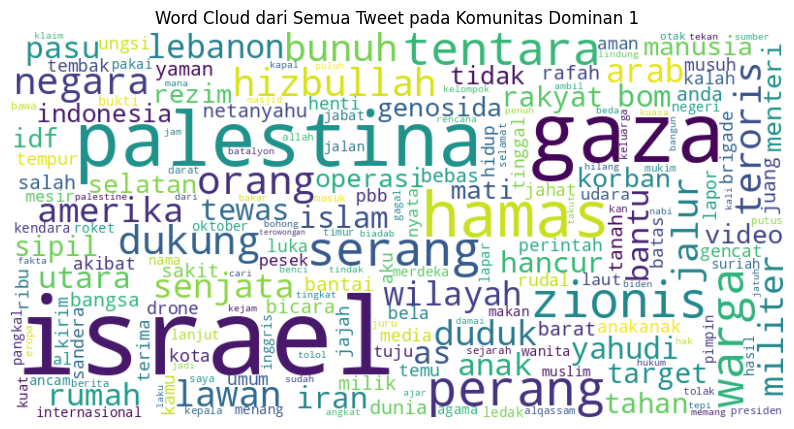

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan kembali kata-kata dalam dokumen menjadi satu string
all_words = ' '.join(df_tokens_stemmed_joined)

# Membuat word cloud dengan memastikan 'hama' dihapus dari stopwords
custom_stopwords = set()  # definisikan stopwords yang Anda inginkan
custom_stopwords.add('hama')  # tambahkan 'hama' agar dihapus dari wordcloud

# Membuat wordcloud
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=110,
    collocations=False,
    stopwords=custom_stopwords,  # gunakan stopwords kustom
    background_color='white'
).generate(all_words)

# Menampilkan wordcloud dengan judul
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Menambahkan judul pada word cloud
plt.title('Word Cloud dari Semua Tweet pada Komunitas Dominan 1', fontsize=12)

# Menampilkan plot
plt.show()

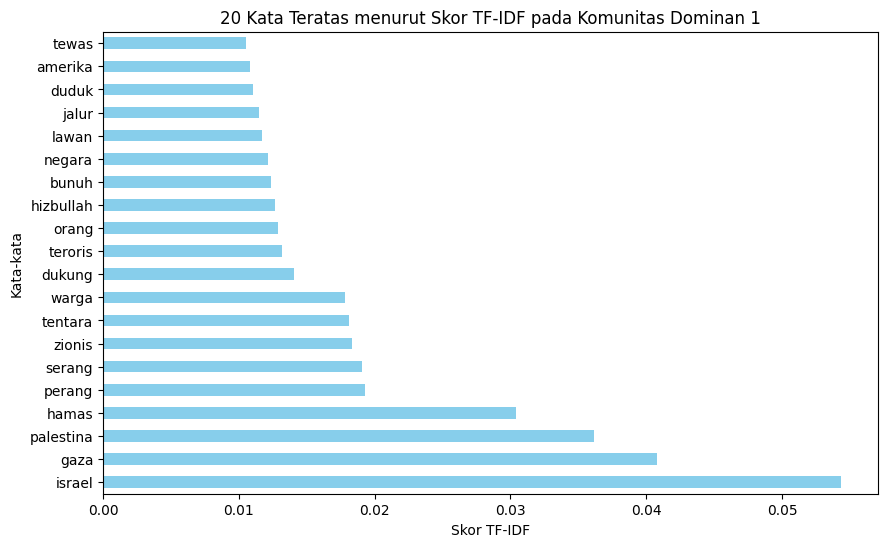

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung rata-rata nilai TF-IDF untuk setiap kata
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Menampilkan 20 kata dengan nilai TF-IDF tertinggi
top_n = 20
plt.figure(figsize=(10, 6))
mean_tfidf.head(top_n).plot(kind='barh', color='skyblue') # Tukar ke 'barh' untuk horizontal
plt.title(f'{top_n} Kata Teratas menurut Skor TF-IDF pada Komunitas Dominan 1')
plt.ylabel('Kata-kata') # Tukar label sumbu
plt.xlabel('Skor TF-IDF') # Tukar label sumbu
plt.show()

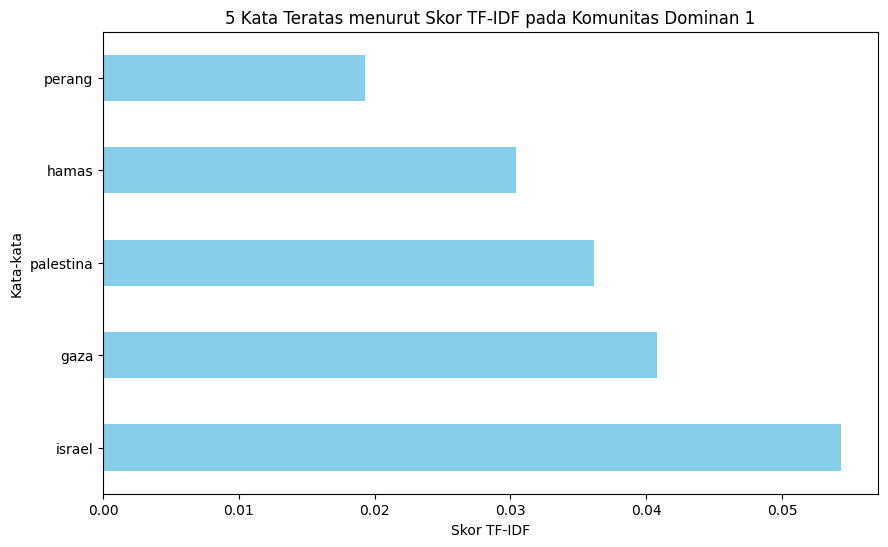

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung rata-rata nilai TF-IDF untuk setiap kata
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Menampilkan 5 kata dengan nilai TF-IDF tertinggi
top_n = 5
plt.figure(figsize=(10, 6))
mean_tfidf.head(top_n).plot(kind='barh', color='skyblue') # Tukar ke 'barh' untuk horizontal
plt.title(f'{top_n} Kata Teratas menurut Skor TF-IDF pada Komunitas Dominan 1')
plt.ylabel('Kata-kata') # Tukar label sumbu
plt.xlabel('Skor TF-IDF') # Tukar label sumbu
plt.show()

## <center><font color="pink">Mengecek Kesesuaian Topik</font></center>

Dengan menampilkan tweet dari user berpengaruh di Cluster 0

In [ ]:
# Menampilkan 3 User dengan indegree teratas (User paling banyak dimention)
df_leiden[df_leiden['Cluster'] == 0].nlargest(3, 'indegree')[['Id', 'indegree']]

,Id,indegree
7,Narasi_winda,35
37,jokowi,35
95,bnsphrxyzzz,32


In [ ]:
# Menampilkan beberapa tweet yang me-mention user Narasi_winda
pd.set_option('display.max_colwidth', None)
df_baru[df_baru['full_text'].str.contains('@Narasi_winda')]['full_text'].head(5)

,full_text
145,@Narasi_winda Dari dulu Hamas emang pengecut. Menjadikan rakyat sipilnya sendirk sbg tameng. Meroket pemukiman sipil Israel. Sementara pimpinan hidup mewah di luar Gaza https://t.co/EYe2N5B4P4
1393,@Narasi_winda Makanya hamas itu cuma parasit. Sifat parasit cari makan numpang ditanaman lain sehingga tanaman yg dia tumpangi yg jd inangnya kurus. Cara2 sandera hamas ini absolut cara2 teroris yg berlindung dipantat rakyat sipil. Semoga rkyt palestina s
3027,@Narasi_winda Coba kasih tanggapan terhadap narasi kristen tertindas oleh israel https://t.co/YKyrvLayVx
3441,@Narasi_winda Hamas ini anti perdamaian.
3511,@Narasi_winda Hamas jauh lbh kuat dibanding hizbulah ya dianggap enteng oleh israel


In [ ]:
# Menampilkan beberapa tweet yang me-mention user jokowi
df_baru[df_baru['full_text'].str.contains('@jokowi')]['full_text'].head(5)

,full_text
753,@tishaputrie @Jhony_tel @jokowi Belajar juga sejarah kalau kepemilikan tanah itu pasti berubah untuk pihak yang kalah perang. Bangsa Israel selalu mengalahkan para agresornya. Jadi wajar saja kalau batas negaranya berubah. Palestina harusnya menerima keny
1422,@dwioktariyadi @jokowi @Menlu_RI @Kemlu_RI Ya udah berangkat aja knp pake demo segala... Beli tiket ke Jordan atau ke Mesir abis itu baru jalan darat ke Gaza...
1431,@dwioktariyadi @jokowi @Menlu_RI @Kemlu_RI Ganyang Teroris zionis israel
1443,@Affan79992133 @jokowi pemerintah juga gcuman manis mulut gak ada aksi konkret bela palestina kita unat muslim hanya bisa berdoa untuk kemenangan palestina
1527,@Jhony_tel @LSM_GRACIA @jokowi Lu buka deklarasi balfour 1917 ! Jangan apa apa langsung telen mentahÂ² dari media lu sekolah kan masa males banget baca ga mikir kritis sama sekali gamau cari tau. percuma juga ngasih tau siapa hamas sejarah Palestina kalo


In [ ]:
# Menampilkan beberapa tweet yang me-mention user bnsphrxyzzz
df_baru[df_baru['full_text'].str.contains('@bnsphrxyzzz')]['full_text'].head(5)

,full_text
22792,@somtyatiuppp @bnsphrxyzzz @jokowi Hahaha. Yang pada donasi juga bayar pajak bro. Di ratakan silakan saja itu hanya bangunan bisa di bangun lagi.! Zionis Israel oleh lebih dari setengah penduduk bumi di anggap #Ä±sraelIsATerroristState
22892,akun2 pro israel itu ga berani mendebat krn memang twetnya cuma buat ngacauin kalangan yg ragu dgn perjuangan palestina trutama hamas mrk ga punya pengetahuan dan fakta yg cukup buat berargumen. Makanya sy sebut idiot spt akun ini @DeHoutman_id @bnsphrxyzzz
23206,@somtyatiuppp @bnsphrxyzzz Dan nyatanya mereka terlunta lunta dan hanya menjadi budak di setiap peradapan Dr jmn babylonia mesir persia..hingga eropa dan terakhir hampir musnah di jaman hitler Dan atas jasa palestina mrk di terima sbg pengungsi ...
23225,@somtyatiuppp @bnsphrxyzzz @jokowi Gedung RS indonesia ada di Gaza dari mana ko tau klo uang nya lari buat beli peluru dan senjata? Pernah ke Gaza? Jgn seperti zionis Israel lah suka bikin Hoak. Itu yang jelas Amerika dan Barat bantu senjata ke zionis Isr
23237,@bnsphrxyzzz @Valhallaah Masalah otak yang menciuttt karena penuh kebencian itu begini boss... 1. Berita buruk tentang Hamas mereka tidak percaya. 2. Ada bukti mereka bilang itu taktik/propaganda. 3. Kalaupun bener mereka akan bilang Palestina dizolimi ja


In [ ]:
# Menampilkan 3 User dengan outdegree teratas (User paling banyak me-mention)
df_leiden[df_leiden['Cluster'] == 0].nlargest(3, 'outdegree')[['Id', 'outdegree']]

,Id,outdegree
41,NusantaraSaja,26
122,alifnuranhar1,15
19,Chikzt,14


In [ ]:
# Menampilkan tweet dari user NusantaraSaja
pd.set_option('display.max_colwidth', None)
df_baru[df_baru['username'] == 'NusantaraSaja']['full_text'].head(15)

,full_text
897,@SoftWarNews HAMAS dan radikalis teror Indonesia sudah terbiasa tipu gunakan ayat jadi sulit dipercaya
930,@VirenOG Duluan Arab Palestina serang Israel pada hari kemerdekaannya 1948. Stop play victim
1580,Ditemukan mayat orang orang yang diculik HAMAS. Bukti bahwa HAMAS adalah teroris https://t.co/trnCHju3gc Militer Israel mengklaim pihaknya telah menemukan mayat beberapa sandera yang diculik oleh Hamas selama operasi di Gaza minggu ini.
1835,PDIP usul STNK tidak bisa diperpanjang jika gagal uji emisi. PDIP bukan parpol wong cilik https://t.co/God7dy8AHD Tilang kendaraan tidak lolos uji emisi akan diberlakukan 1 November. Legislator PDIP mengusulkan kendaraan tak lolos uji emisi STNK-nya tidak diperpanjang.
6656,Retno kutuk Israel pindah paksa warga Gaza padahal itu relokasi sementara dari daerah target perang supaya tidak ada korban sipil Harusnya Retno desak Hamas bebaskan sandera https://t.co/mkFTCRLNeV
6888,Miris dengan realise detail 7000 korban Gaza. Tapi tetap ada pertanyaan besar kenapa tidak segera bebaskan semua sandera tanpa syarat supaya perang segera berakhir ? @Menlu_RI @IDF @netanyahu @adearmando61 https://t.co/JBqtqx7Tn9
7329,AWALNYA PALESTINA DAN ISRAEL SAMA SAMA JAJAHAN OTTOMAN - TURKI SAAT INI. SETELAH OTTOMAN KALAH PERANG ISRAEL DAN PALESTINA DIBERIKAN HAK MERDEKA. TAPI HANYA ISRAEL YANG PROKLAMASI PALESTINA MENOLAK. AKIBATNYA PALESTINA SIAL SAMPAI SAAT INI
7359,@Srihart2233 Waktu lalu Menlu kita mesra dengan Taliban jadi curiga dengan paham yang beliau anut
7873,@SoftWarNews Kalau gitu biarkan dan dukung saja Israel serang Gaza Jangan emosi ya
8000,Palestina mulai memanfaatkan keadaan minta perhatian Internasional tanpa desak Hamas bebaskan semua sandera tanpa syarat https://t.co/gXgSeA1UMO


In [ ]:
# Menampilkan tweet dari user alifnuranhar1
df_baru[df_baru['username'] == 'alifnuranhar1']['full_text'].head(5)

,full_text
21606,Akun lonte medsos @AbahDeon @SammiSoh dibayar ZIONIS @Israel utk menebar fitnah dan kebencian. Akun2 tsb membela @IDF dg umbar kebencian kepada ISLAM ULAMA dan SYARIAT ISLAM Padahal INDONESIA sangat tegas MENGHUJAT @Israel Dan anehnya @ListyoSigitP mendiamkan hal tsb.
27459,@bnsphrxyzzz Widih...ternyata @bnsphrxyzzz punya ternak akun lonte medsos bayaran @netanyahu @Israel @IDF ... Silahkan nyerocos cari makan dg cara tebar fitnah dan kebencian. Umat ISLAM tetap berkembang ISLAM TETAP jaya hingga akhir zaman Dan @Israel akan
29544,Akun2 @Valhallaah @AndriAgust92281 @SammiSoh @bnsphrxyzzz @Tita83079013 TIAP WAKTU menebar narasi FITNAH dan KEBENCJAN Mereka MENISTA Islam dan adudomba anak BANGSA Tema2 pesanan @IDF @netanyahu antara lain : PALESTINE ISLAM SYARIAH BUDAYA SEJARAH PANCASILA Cc @jokowi
39131,@Narasi_winda Duh bahagianya....bs jadikan bintang daud buat KESET kotoran BABI Cc @netanyahu @IDF @Israel https://t.co/v4ep5nMiPY
40259,Pumya hobi baru injak2 simbol negara TERORIS @Israel @IDF buat KESETAN kotoran BABI Cc @netanyahu https://t.co/jA7iveFO5M


In [ ]:
# Menampilkan tweet dari user Chikzt
df_baru[df_baru['username'] == 'Chikzt']['full_text'].head(5)

,full_text
485,@RagilSemar gak ngemeng itu sama hamas yg nyerang dan bunuh semua org yg mereka temui?
4933,@IATeam___ Ngibul teroris hamas bikin gaza nangis
4959,@wildzimul @IATeam___ @IDF Br bs jalan tp sukses bikin gaza nangis2
4960,@IATeam___ @IDF Gaza lagi nangis2 tuh..gak pengen gabung?
4974,@cahyok2cahyok1 @IATeam___ Yaelah jd buzzer modal template doang? Sono ke gaza


# <center><font color="pink">**Komunitas dominan 2 (Cluster-1)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 2 (Cluster-1)</font></center>

In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 1
cluster_1 = df_leiden[df_leiden['Cluster'] == 1][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 1

# Menyimpan jumlah user cluster 1 ke dalam variabel jumlah_id_cluster_1
jumlah_id_cluster_1 = len(cluster_1['Id'].unique())
# Melihat jumlah user cluster 1
print(f"Jumlah user pada Cluster 1 ada sebanyak {jumlah_id_cluster_1} user.")

# Menyimpan nama-nama user cluster 1 ke dalam variabel cluster_1_id
cluster_1_id = cluster_1['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 1
print(cluster_1_id)

Jumlah user pada Cluster 1 ada sebanyak 45 user.

Berikut adalah nama user-usernya:
['Ndons_Back' 'prabowo' 'tvOneNews' 'bengkeldodo' 'Reivolusi'
 'mickolv_idas' 'aniesbaswedan' 'jogjaplaza' 'gibran_tweet' 'Fahrihamzah'
 'Kimberley_2024' 'Panglima6789' 'wachyumkiji' 'kurawa' 'ruyasagit900'
 'Gojokaisen86' 'are_inismyname' 'AndreasSolusi' 'P4P4B0W0_2024'
 'florieliciouss' 'Bank_Joee_' '99propaganda' 'EN538474N6' 'seeksixsuck'
 'zarryhendrik' 'Afgan772' 'BANGSAygSUJUD' 'dionsumir' 'paradox_2020'
 'IrawanRommi' 'isaansori156249' 'blackangler3' 'eowyn_targaryen'
 'namchanis' 'LaskarGAZA' 'BFbu88' 'dimaz_gaza' 'PJumadi3' 'nurcahya23264'
 'B1516EFG' '1231_rina' 'lokiluki583' 'IntanNuraini091' 'gwgituloooh'
 'Kimberley_PS08']


In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_1_id
df_cluster_1 = df_baru[df_baru['username'].isin(cluster_1_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_1 = df_cluster_1['full_text']

df_tweet_cluster_1.head()

,full_text
27,@rahmatsn Tapi prabowo latih pasukan hamas loh...
322,Tuhan kasih otak buat Berfikir Agama sudah mem...
337,@abu_waras Trus kalau gitu survey nya di mana ?
456,@GanRusdi @Gladislagiwoy Brigade AlQasam Pales...
1046,waduh rumitz ini


In [ ]:
pd.set_option('display.max_colwidth', None)
df_tweet_cluster_1[df_tweet_cluster_1.str.contains("israel", case=False)].head(15)

,full_text
1983,Bukan ke Israel McDonald's Beri Sumbangan Rp4 Miliar ke Gaza https://t.co/Fk7CPKvq0M
2902,Semuanya akan diminta pertanggungjawaban nya kelak dan pemimpin Israel harus bertanggungjawab dengan segala dosanya dosanya kelak #IsraelTerorrist
2917,The real teroris yang sesungguhnya. Mereka berdua adalah dua pemimpin jahat menurut saya. Yang satu selalu main playing victim seolah olah mereka yang tersakiti yaitu bangsa Israel padahal sebenarnya mereka adalah penjajah sesungguhnya di tanah Palestina. #SavePalestina
5163,Efek Perang Israel-Palestina 23 Jurnalis Terbunuh di Gaza https://t.co/5XPFBkvEDv
10953,@el_f4hm1 Kan udah dibantah Makanya gak ada data terbuka terkait dengan import itu perjanjian ditahun berapa dan siapa yg melakukan tanda tangan gue gak bisa jawab kecuali dr kemnhan sendiri terus anda pakai Google itu israel loh .. knp pakai ? Sergey Mik
16131,israel teroris berbisnis tawanan yang di bebaskan maupun yang di jual organnya
16283,@dhemit_is_back @ganjarpranowo terkait bendera pa ganjar tentu tidak bisa mengatur pendukungnya mau warna pa. dan sikap terhadap israel cukup jelas ketika menolak tim sepak bola israel masuk indonesia
17651,Tak Disangka-sangka Data BPS: Ekspor Indonesia ke Israel Lebih Besar dari Ekspor Ke Palestina Ini Hitungannya https://t.co/2IpT7uv0vz
18623,@adri_7i Kamren pas israel palestina belum populer sebelum perang cuman no 3 mas ganjar yg tegas menolak israel maen Yg laen mana berani pada diem semua
20231,Pilot helikopter Israel yang didoktrin sebagai yang dipilih Tuhan menmbaki warga sipil isarel yang sedang berpesta. ketika ditanya apakah dia sadar yang dubunuhnya adalah rakyatnya sendiri dia menjawab Ta masalah kita buat HAMAS yang akan disalahkan


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
# Case Folding
df_tweet_cluster_1 = df_tweet_cluster_1.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_1.head()

,full_text
27,@rahmatsn tapi prabowo latih pasukan hamas loh...
322,tuhan kasih otak buat berfikir agama sudah mem...
337,@abu_waras trus kalau gitu survey nya di mana ?
456,@ganrusdi @gladislagiwoy brigade alqasam pales...
1046,waduh rumitz ini


In [ ]:
# Menjalankan fungsi clean_tweet pada data df_cleaned1
df_cleaned1 = df_tweet_cluster_1.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned1.head()

,full_text
27,tapi prabowo latih pasukan hamas loh abu janda...
322,tuhan kasih otak buat berfikir agama sudah mem...
337,trus kalau gitu survey nya di mana
456,brigade alqasam palestine berhasil masuk ke ma...
1046,waduh rumitz ini


In [ ]:
# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned1
df_tokens1 = df_cleaned1.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens1.head()

,full_text
27,"[tapi, prabowo, latih, pasukan, hamas, loh, ab..."
322,"[tuhan, kasih, otak, buat, berfikir, agama, su..."
337,"[trus, kalau, gitu, survey, nya, di, mana]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,"[waduh, rumitz, ini]"


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Menjalankan fungsi stopwords_removal pada data df_tokens1
df_tokens_sw1 = df_tokens1.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw1.head()

,full_text
27,"[prabowo, latih, pasukan, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntutan..."
337,"[trus, gitu, survey]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,[rumitz]


In [ ]:
# Menjalankan fungsi replace_slang pada data df_tokens1
df_tokens_norm1 = df_tokens_sw1.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm1.head()

,full_text
27,"[prabowo, latih, pasukan, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntutan..."
337,"[terus, begitu, survei]"
456,"[brigade, alqasam, palestine, berhasil, masuk,..."
1046,[rumitz]


In [ ]:
# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm1:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

2748


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

In [ ]:
# Menjalankan fungsi get_stemmed_term pada data df_tokens
df_tokens_stemmed1 = df_tokens_norm1.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed1.head()

,full_text
27,"[prabowo, latih, pasu, hamas, abu, janda, mah]"
322,"[tuhan, kasih, otak, berfikir, agama, tuntut, ..."
337,"[terus, begitu, survei]"
456,"[brigade, alqasam, palestine, hasil, masuk, ma..."
1046,[rumitz]


## <center><font color="pink">TF-IDF</font></center>

In [ ]:
# Menggabungkan token yang sudah distemming menjadi kalimat kembali
df_tokens_stemmed_joined1 = df_tokens_stemmed1.apply(lambda x: ' '.join(x))

In [ ]:
# Menerapkan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_tokens_stemmed_joined1)

In [ ]:
# Melihat hasilnya sebagai DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

   aaaminn  aaaminnn  aamiin  abai  abb  abdalla  abdi  abdul  aborigin  \
0      0.0       0.0     0.0   0.0  0.0      0.0   0.0    0.0       0.0   
1      0.0       0.0     0.0   0.0  0.0      0.0   0.0    0.0       0.0   
2      0.0       0.0     0.0   0.0  0.0      0.0   0.0    0.0       0.0   
3      0.0       0.0     0.0   0.0  0.0      0.0   0.0    0.0       0.0   
4      0.0       0.0     0.0   0.0  0.0      0.0   0.0    0.0       0.0   

   abshar  ...  zabur  zainul  zakat  zaman  zarry    zionis  zionist  zon  \
0     0.0  ...    0.0     0.0    0.0    0.0    0.0  0.000000      0.0  0.0   
1     0.0  ...    0.0     0.0    0.0    0.0    0.0  0.000000      0.0  0.0   
2     0.0  ...    0.0     0.0    0.0    0.0    0.0  0.000000      0.0  0.0   
3     0.0  ...    0.0     0.0    0.0    0.0    0.0  0.435514      0.0  0.0   
4     0.0  ...    0.0     0.0    0.0    0.0    0.0  0.000000      0.0  0.0   

   zulhas  zulkifli  
0     0.0       0.0  
1     0.0       0.0  
2     0.0     

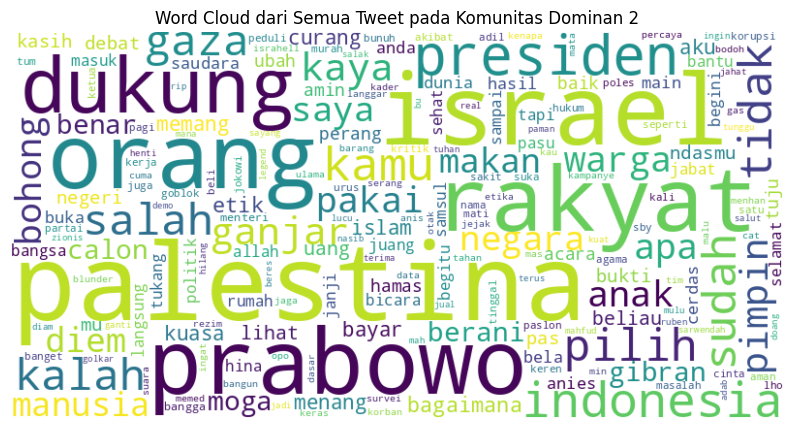

In [ ]:
# Menggabungkan kembali kata-kata dalam dokumen menjadi satu string
all_words1 = ' '.join(df_tokens_stemmed_joined1)

# Membuat word cloud
wordcloud1 = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(all_words1)

# Menampilkan word cloud dengan judul
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')

# Menambahkan judul pada word cloud
plt.title('Word Cloud dari Semua Tweet pada Komunitas Dominan 2', fontsize=12)

# Menampilkan plot
plt.show()

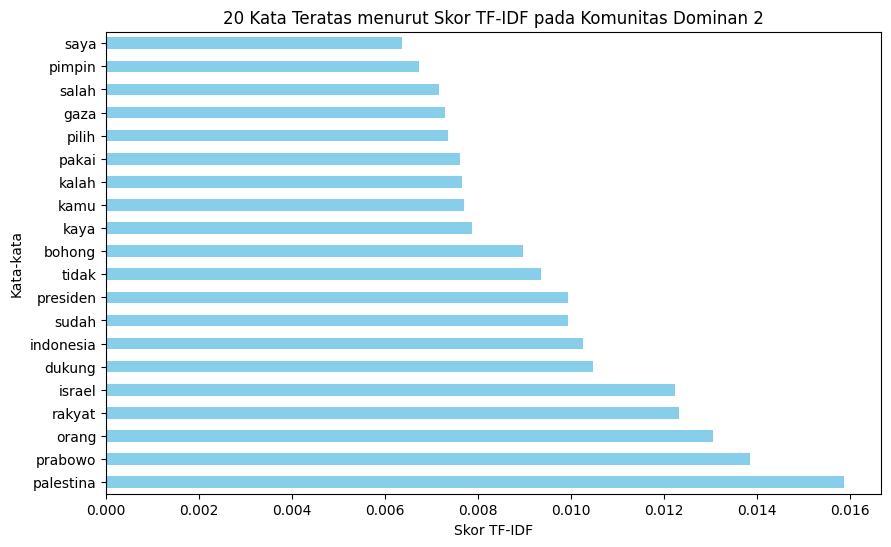

In [ ]:
# Menghitung rata-rata nilai TF-IDF untuk setiap kata
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Menampilkan 20 kata dengan nilai TF-IDF tertinggi
top_n = 20
plt.figure(figsize=(10, 6))
mean_tfidf.head(top_n).plot(kind='barh', color='skyblue') # Tukar ke 'barh' untuk horizontal
plt.title(f'{top_n} Kata Teratas menurut Skor TF-IDF pada Komunitas Dominan 2')
plt.ylabel('Kata-kata') # Tukar label sumbu
plt.xlabel('Skor TF-IDF') # Tukar label sumbu
plt.show()

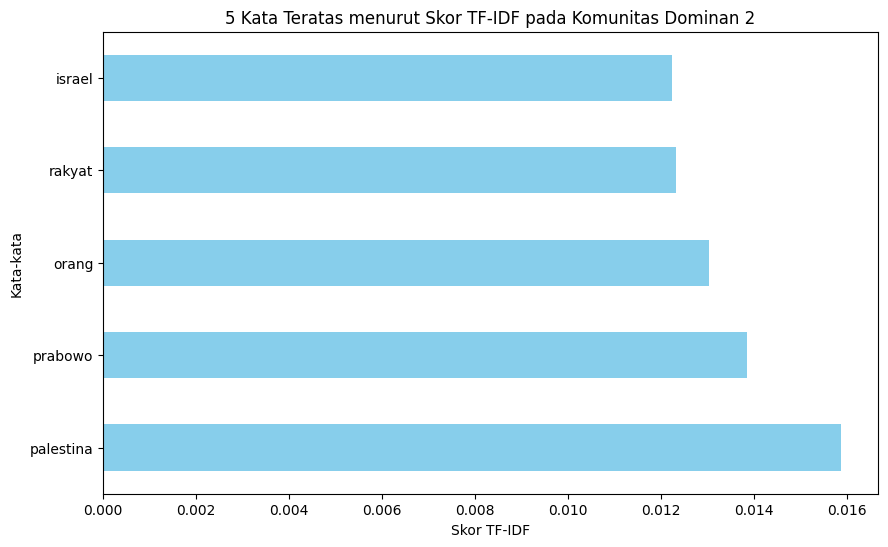

In [ ]:
# Menghitung rata-rata nilai TF-IDF untuk setiap kata
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Menampilkan 5 kata dengan nilai TF-IDF tertinggi
top_n = 5
plt.figure(figsize=(10, 6))
mean_tfidf.head(top_n).plot(kind='barh', color='skyblue') # Tukar ke 'barh' untuk horizontal
plt.title(f'{top_n} Kata Teratas menurut Skor TF-IDF pada Komunitas Dominan 2')
plt.ylabel('Kata-kata') # Tukar label sumbu
plt.xlabel('Skor TF-IDF') # Tukar label sumbu
plt.show()

## <center><font color="pink">Mengecek Kesesuaian Topik</font></center>

Dengan menampilkan tweet dari user berpengaruh di Cluster 1

In [ ]:
# Menampilkan 3 User dengan indegree teratas (User paling banyak dimention)
df_leiden[df_leiden['Cluster'] == 1].nlargest(3, 'indegree')[['Id', 'indegree']]

,Id,indegree
1,Ndons_Back,26
10,bengkeldodo,26
79,are_inismyname,26


In [ ]:
# Menampilkan beberapa tweet yang me-mention user Ndons_Back
pd.set_option('display.max_colwidth', None)
df_baru[df_baru['full_text'].str.contains('@Ndons_Back')]['full_text'].head(5)

,full_text
5835,@Gojokaisen86 @are_inismyname @azissubekti @AndreasSolusi @P4P4B0W0_2024 @bengkeldodo @AlmaghribiS @florieliciouss @Bank_Joee_ @Ndons_Back @99propaganda @KhoirilAnwar_ Setuju sekali dulu ketika Indonesia dijajah Belanda Palestina adalah salah satu negara
5878,@are_inismyname @azissubekti @AndreasSolusi @P4P4B0W0_2024 @bengkeldodo @AlmaghribiS @florieliciouss @Bank_Joee_ @Ndons_Back @99propaganda @KhoirilAnwar_ Semoga pemimpin Indonesia juga kelak bisa ikut bersuara dengan penindasan yang saat ini terjadi di Pa
12040,@bengkeldodo @0K4Y08 @1000waystod1e @99propaganda @_NusantaraLand_ @adri_7i @Ndons_Back @are_inismyname @BANGHAYEK @EricRicaldo @P4P4B0W0_2024 jgn terlalu serius berbeda pendapatnya ingat karikatur ini. Lagi pula Zionist Israel itu akan tetap ada sd menje
12075,@bengkeldodo @tinggipasaribu @0K4Y08 @1000waystod1e @99propaganda @_NusantaraLand_ @adri_7i @Ndons_Back @are_inismyname @BANGHAYEK @EricRicaldo @P4P4B0W0_2024 Kurang apa keluarga Baswedan kakeknyapun jadi negosiator utk mengakui kemerdekaan Indonesia dan
12290,@bengkeldodo @0K4Y08 @1000waystod1e @99propaganda @_NusantaraLand_ @adri_7i @Ndons_Back @are_inismyname @BANGHAYEK @EricRicaldo @P4P4B0W0_2024 iya dah sipaling palestine ï¸


In [ ]:
# Menampilkan beberapa tweet yang me-mention user bengkeldodo
df_baru[df_baru['full_text'].str.contains('@bengkeldodo')]['full_text'].head(5)

,full_text
198,@bengkeldodo @prabowo Lah itu memang tugasnya sbg menteri pertahanan umtuk mengantisipasi konflik Israel hamas yg pasti akan mempengaruhi aspek politik ekonomi sama halnya dgn konflik Ukraina
5835,@Gojokaisen86 @are_inismyname @azissubekti @AndreasSolusi @P4P4B0W0_2024 @bengkeldodo @AlmaghribiS @florieliciouss @Bank_Joee_ @Ndons_Back @99propaganda @KhoirilAnwar_ Setuju sekali dulu ketika Indonesia dijajah Belanda Palestina adalah salah satu negara
5878,@are_inismyname @azissubekti @AndreasSolusi @P4P4B0W0_2024 @bengkeldodo @AlmaghribiS @florieliciouss @Bank_Joee_ @Ndons_Back @99propaganda @KhoirilAnwar_ Semoga pemimpin Indonesia juga kelak bisa ikut bersuara dengan penindasan yang saat ini terjadi di Pa
12040,@bengkeldodo @0K4Y08 @1000waystod1e @99propaganda @_NusantaraLand_ @adri_7i @Ndons_Back @are_inismyname @BANGHAYEK @EricRicaldo @P4P4B0W0_2024 jgn terlalu serius berbeda pendapatnya ingat karikatur ini. Lagi pula Zionist Israel itu akan tetap ada sd menje
12075,@bengkeldodo @tinggipasaribu @0K4Y08 @1000waystod1e @99propaganda @_NusantaraLand_ @adri_7i @Ndons_Back @are_inismyname @BANGHAYEK @EricRicaldo @P4P4B0W0_2024 Kurang apa keluarga Baswedan kakeknyapun jadi negosiator utk mengakui kemerdekaan Indonesia dan


In [ ]:
# Menampilkan beberapa tweet yang me-mention user are_inismyname
df_baru[df_baru['full_text'].str.contains('@are_inismyname')]['full_text'].head(5)

,full_text
5835,@Gojokaisen86 @are_inismyname @azissubekti @AndreasSolusi @P4P4B0W0_2024 @bengkeldodo @AlmaghribiS @florieliciouss @Bank_Joee_ @Ndons_Back @99propaganda @KhoirilAnwar_ Setuju sekali dulu ketika Indonesia dijajah Belanda Palestina adalah salah satu negara
5878,@are_inismyname @azissubekti @AndreasSolusi @P4P4B0W0_2024 @bengkeldodo @AlmaghribiS @florieliciouss @Bank_Joee_ @Ndons_Back @99propaganda @KhoirilAnwar_ Semoga pemimpin Indonesia juga kelak bisa ikut bersuara dengan penindasan yang saat ini terjadi di Pa
12040,@bengkeldodo @0K4Y08 @1000waystod1e @99propaganda @_NusantaraLand_ @adri_7i @Ndons_Back @are_inismyname @BANGHAYEK @EricRicaldo @P4P4B0W0_2024 jgn terlalu serius berbeda pendapatnya ingat karikatur ini. Lagi pula Zionist Israel itu akan tetap ada sd menje
12075,@bengkeldodo @tinggipasaribu @0K4Y08 @1000waystod1e @99propaganda @_NusantaraLand_ @adri_7i @Ndons_Back @are_inismyname @BANGHAYEK @EricRicaldo @P4P4B0W0_2024 Kurang apa keluarga Baswedan kakeknyapun jadi negosiator utk mengakui kemerdekaan Indonesia dan
12290,@bengkeldodo @0K4Y08 @1000waystod1e @99propaganda @_NusantaraLand_ @adri_7i @Ndons_Back @are_inismyname @BANGHAYEK @EricRicaldo @P4P4B0W0_2024 iya dah sipaling palestine ï¸


In [ ]:
# Menampilkan 3 User dengan outdegree teratas (User paling banyak me-mention)
df_leiden[df_leiden['Cluster'] == 1].nlargest(3, 'outdegree')[['Id', 'outdegree']]

,Id,outdegree
46,jogjaplaza,20
134,LaskarGAZA,17
145,dimaz_gaza,17


In [ ]:
# Menampilkan tweet dari user jogjaplaza
pd.set_option('display.max_colwidth', None)
df_baru[df_baru['username'] == 'jogjaplaza']['full_text'].head(5)

,full_text
1046,waduh rumitz ini
1055,unyu2 ya buuuuwww
1083,@mihrabku sefaham saya seperti masyarakat jawa asal mula sunda itu non muslim lalu dakwah masuk dan ada yang tetap memepertahankan agama leluhur seperti adanya kejawen. hanya klo pakai babi saya kurang faham.
1615,@wahyoe_affandy @NasDem nama nya aperlinus anggota partai @NasDem ????
1902,@tvOneNews memang harus di demo dulu ya @McDonalds kita tunggu realisasinya


In [ ]:
# Menampilkan tweet dari user LaskarGAZA
df_baru[df_baru['username'] == 'LaskarGAZA']['full_text'].head(5)

,full_text
29470,@Gojekmilitan Rumah ABU DAJAL INI DIMANA YAH Sepertinya harus Secepatnya dibereskan !!....dari pada ga bisa ngilangin nyawa Teroris IDF di Israel ga usah jauh jauh ni zionis hidung kloset HALAL LEHERNYA. Tolong ada yg tau info tempat tinggal dak keluargan
29506,@ZulkifliLubis69 @DanteSpeak_USA_ Mungkin Maksudnya Di kritik Boleh seperti Tolol Goblok Bodoh koruptor sial tapi jgn dihina seperti mengatakan Babi anjing binatang gitu kali yah pak?
29659,@Muslim_AntiPKI9 @Gojekmilitan Ya betul dan langsung Mati di Tempat tidak pake tawar tawar ditempat harus mati.
30082,@Dj_Asphury @Greschinov @elonmusk MANTAPPPPP Turunkan semua Dukun dukun Indonesia Terbangkan semua pocong pocong itu ke Tel Aviv
42047,SPANYOL bersama pemerintahnya telah berpihak pada Palestinaðµð¸ sejak awal dan tidak pernah berhenti melakukan protes. SPANYOL VALENCIA...Dukungan untuk Palestina protes terhadap Israel... #reels #palestine #gaza #palestine #europe #trt #bbc #nbc #cnn #zdf #gaza #history #rome https://t.co/JMs2ZactX4


In [ ]:
# Menampilkan tweet dari user dimaz_gaza
df_baru[df_baru['username'] == 'dimaz_gaza']['full_text'].head(5)

,full_text
40566,@BoSpot_ @RonnyYulianto13 Gpp ditempelin doank biar bebas tuntutan lha.
47486,@alextham878 Bayangkan TUKANG POLES CAT DUCO ini kalo lagi ngoceh demi cuanbya sendiri tapi sok memanfaat perasaan orang lain diobral murah. Dasar Tukang Poles Koplak lu @alextham878 ï¸ï¸
47503,@alextham878 Tiktok dijadikan referensi utama seolah Prabowo jd orang di dzholimin TUKANG POLES CAT DUCO ketahuan kerjaannya ga beres nih.
47524,@alextham878 TUKANG POLES CAT DUCO lagi kerja nih
47532,@ajengcute16__ Lagi pindah profesi jadi tukang poles cat duco yg biasa mangkal dr jln Salemba ampe Senen nih kader @PDemokrat


# <center><font color="pink">**Komunitas dominan 3 (Cluster-2)**</font></center>
Melihat topik-topik terdeteksi dari kata-kata yang paling sering muncul.

## <center><font color="pink">Ambil semua tweet dari komunitas dominan 3 (Cluster-2)</font></center>

In [ ]:
# Membentuk data frame yang berisi Id, indegree dan outdegree dari cluster 2
cluster_2 = df_leiden[df_leiden['Cluster'] == 2][['Id', 'indegree', 'outdegree']]

# Menampilkan jumlah user dan nama-namanya yang ada pada cluster 2

# Menyimpan jumlah user cluster 2 ke dalam variabel jumlah_id_cluster_2
jumlah_id_cluster_2 = len(cluster_2['Id'].unique())
# Melihat jumlah user cluster 2
print(f"Jumlah user pada Cluster 2 ada sebanyak {jumlah_id_cluster_2} user.")

# Menyimpan nama-nama user cluster 2 ke dalam variabel cluster_2_id
cluster_2_id = cluster_2['Id'].to_numpy()
# Mencetak tulisan untuk judul
print('\nBerikut adalah nama user-usernya:')
# Melihat nama-nama user cluster 2
print(cluster_2_id)

Jumlah user pada Cluster 2 ada sebanyak 33 user.

Berikut adalah nama user-usernya:
['bnsphrxyz' 'LoudMinorities' 'antikadrunbang' 'DeHoutman_id'
 'alfatih212426' 'SammiSoh' 'AyaniMel' 'Kappa_2023' 'asasfuro' 'JinNonik'
 'JokoPintar2' 'aesculapiusw' 'incognito_grey' 'Amox1L1N' '__anomali__'
 'Wisnuhid' 'ridho45916919' 'ajegilelu1' 'AsbabulKop51425' 'MarioInferno'
 'JLion555' 'HabanglaliK' 'Froyo64' 'Apokrifa23' 'Balistta'
 'AnakBawang_0705' 'MinminCha94972' 'fmn99_gaming' 'johnhomebapa'
 'ScioCogitoCredo' 'imamDouma' 'eeh_ito' 'anarchyhumanist']


In [ ]:
# Mengambil data dari variabel full_text pada df_baru yang ada username dari variabel cluster_2_id
df_cluster_2 = df_baru[df_baru['username'].isin(cluster_2_id)]

# Mengambil bagian full_text nya saja
df_tweet_cluster_2 = df_cluster_2['full_text']

df_tweet_cluster_2.head()

,full_text
143,Yup Yg lebih tragic n lebih hina itu kita diam...
470,Ini pengecutnya teroris Hamas. Saat mereka mem...
919,@zoelfick Seharusnya pejuang Hamas cari medan ...
1239,@PribadiBales @LonenyDragon @Amran_bin_Ali @Wa...
1264,Tukang hoax @bnsphrxyz yg mnghina hukum Taurat...


In [ ]:
pd.set_option('display.max_colwidth', None)
df_tweet_cluster_2[df_tweet_cluster_2.str.contains("dunia", case=False)].head(15)

,full_text
1345,Mata penduduk dunia lagi di bukakan oleh Allah Dunia sedang menyorot Teroris zionis Israel ngebantai penduduk sipil yang pergi mengungsi
6435,@Kappa_2023 @agama_nusantara @mx00711 @_christing_ @Tita83079013 @AremaNita__ @duniamaya_29 @bnsphrxyz @sakkusaitna @debbieflavi @RefublikAteis @frank21blue @BayuAngora @spektrumku @silarakhito @Valhallaah @OmbakBanyu2 @PaijoKhentir @NamoAryatara @ahmedas
8889,@PatenSiahaan @Prabudimasadji1 Sampai detik ini saya belum ada sesenpun dapat dari Israel. Boleh kalo ada siapa yg harus saya hubungi? lumayan buat ganti Iphone 15. Saya membela Israel karena Kekejaman Hamas diluar batas peri kemanusiaan tapi dunia Buta!
10654,@Detektif_Negara @kuasabu2 @veroaktivis @Tita83079013 @mohmahfudmd Kenapa mereka selalu begini? Tidak peduli orang lain ditegur tapi belagak pilon. Diingatkan tapi merasa benar. Begitu diladeni langsung koar-koar ke seluruh dunia ngaku dianiaya. Persis Is
10952,ini yang harus nya Dunia Tau! Hamas Menjual Derita Rakyat Palestina karena Perang untuk Propaganda. Mereka menggunakan ambulan untuk transportasi #HamasTerrorrists
12834,@PediaHoror @km_rifki Yg nyerang infasi Israel itu dan rebut Yerusalem itu adalah Arab pada abat 7 Masehi bangsa Yahudi kocar kacir menyebar keseluruh dunia dan kembali ketanahnya yg diduduki etnis arab yg menamakan diri Palestina Israel itu sudah ada sej
24480,@rubino_lugo @predator__darat @SammiSoh Israel sebelum melakukan serangan selalu memberitahukan warga sipil Gaza untuk menyingkir baik melalui pamflet maupun sambungan telepon Angkatan Bersenjata didunia yg melakukannya setauku hanya Israel sedang Hamas p
30738,@putramakoto @mx00711 @Marnischaniago2 @rasulkita1 @lilianbihh @agazkhatergy_ @0pp4_lee @BayuAngora @Taketimejp @duniamaya_29 @JokoPintar2 @JalanKe83957796 @FeriSuryaSugia1 @Valhallaah @bnsphrxyz @AKU_dgn3putra @PaijoKhentir @balaputra_deva @RefublikAteis
34552,@Add1872 Membuka mata dunia bahwa mereka tidak sekuat itu. Gaza yang hanya sebesar Surabaya tidak mampu mereka kalahkan.
34601,@Add1872 Selain ingin menguasai Palestina mereka juga perlu kepercayaan dunia. Jika menggenosida seterang-terangnya itu maka sia-sia usaha mereka. PBB pasti akan dituntut bahkan ditutup karena dianggap tidak memberikan keadilan. Bom fosfor merupakan senja


## <center><font color="pink">Text Preprocessing</font></center>
Tahap pertama di Text Mining

In [ ]:
# Case Folding
df_tweet_cluster_2 = df_tweet_cluster_2.str.lower()
# Melihat sedikit bagian atas data
df_tweet_cluster_2.head()

,full_text
143,yup yg lebih tragic n lebih hina itu kita diam...
470,ini pengecutnya teroris hamas. saat mereka mem...
919,@zoelfick seharusnya pejuang hamas cari medan ...
1239,@pribadibales @lonenydragon @amran_bin_ali @wa...
1264,tukang hoax @bnsphrxyz yg mnghina hukum taurat...


In [ ]:
# Menjalankan fungsi clean_tweet pada data df_cleaned2
df_cleaned2 = df_tweet_cluster_2.apply(clean_tweet)
# Melihat sedikit bagian atas data
df_cleaned2.head()

,full_text
143,yup yg lebih tragic lebih hina itu kita diam ...
470,ini pengecutnya teroris hamas saat mereka memb...
919,seharusnya pejuang hamas cari medan perang kur...
1239,
1264,tukang hoax yg mnghina hukum taurat ini berusa...


In [ ]:
# Menjalankan fungsi word_tokenize_wrapper pada data df_cleaned2
df_tokens2 = df_cleaned2.apply(word_tokenize_wrapper)
# Melihat sedikit bagian atas data
df_tokens2.head()

,full_text
143,"[yup, yg, lebih, tragic, lebih, hina, itu, kit..."
470,"[ini, pengecutnya, teroris, hamas, saat, merek..."
919,"[seharusnya, pejuang, hamas, cari, medan, pera..."
1239,[]
1264,"[tukang, hoax, yg, mnghina, hukum, taurat, ini..."


## <center><font color="pink">Feature Selection</font></center>
Tahap kedua di Text Mining

In [ ]:
# Menjalankan fungsi stopwords_removal pada data df_tokens2
df_tokens_sw2 = df_tokens2.apply(stopwords_removal)
# Melihat sedikit bagian atas data
df_tokens_sw2.head()

,full_text
143,"[yup, tragic, hina, diam, membiarkan, kebiadab..."
470,"[pengecutnya, teroris, hamas, membordir, israe..."
919,"[pejuang, hamas, cari, medan, perang, kurusetr..."
1239,[]
1264,"[tukang, hoax, mnghina, hukum, taurat, berusah..."


In [ ]:
# Menjalankan fungsi replace_slang pada data df_tokens2
df_tokens_norm2 = df_tokens_sw2.apply(replace_slang)
# Melihat sedikit bagian atas data
df_tokens_norm2.head()

,full_text
143,"[yup, tragic, hina, diam, membiarkan, kebiadab..."
470,"[pengecutnya, teroris, hamas, membordir, israe..."
919,"[pejuang, hamas, cari, medan, perang, kurusetr..."
1239,[]
1264,"[tukang, bohong, mnghina, hukum, taurat, berus..."


In [ ]:
# Membuat dictionary untuk menyimpan kata-kata yang telah di stemming
term_dict = {}
for document in df_tokens_norm2:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Mencetak jumlah istilah yang unik yang telah disimpan dalam term_dict
print(len(term_dict))

2284


In [ ]:
# Memulai loop untuk mengganti nilai dari setiap istilah di term_dict dengan hasil stemming yang diperoleh dari fungsi stemmed_wrapper
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

In [ ]:
# Menjalankan fungsi get_stemmed_term pada data df_tokens2
df_tokens_stemmed2 = df_tokens_norm2.apply(get_stemmed_term)
# Melihat sedikit bagian atas data
df_tokens_stemmed2.head()

NameError: name 'get_stemmed_term' is not defined

## <center><font color="pink">TF-IDF</font></center>

In [ ]:
# Menggabungkan token yang sudah distemming menjadi kalimat kembali
df_tokens_stemmed_joined2 = df_tokens_stemmed2.apply(lambda x: ' '.join(x))

In [ ]:
# Menerapkan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_tokens_stemmed_joined2)

In [ ]:
# Melihat hasilnya sebagai DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

   ababil  abad  abat  abdul  abis  abraham  abrahamik  abu  acak  acapkali  \
0     0.0   0.0   0.0    0.0   0.0      0.0        0.0  0.0   0.0       0.0   
1     0.0   0.0   0.0    0.0   0.0      0.0        0.0  0.0   0.0       0.0   
2     0.0   0.0   0.0    0.0   0.0      0.0        0.0  0.0   0.0       0.0   
3     0.0   0.0   0.0    0.0   0.0      0.0        0.0  0.0   0.0       0.0   
4     0.0   0.0   0.0    0.0   0.0      0.0        0.0  0.0   0.0       0.0   

   ...  yordania  yousef  yunis      yup  zaman  zion    zionis  zionist  \
0  ...       0.0     0.0    0.0  0.40686    0.0   0.0  0.000000      0.0   
1  ...       0.0     0.0    0.0  0.00000    0.0   0.0  0.000000      0.0   
2  ...       0.0     0.0    0.0  0.00000    0.0   0.0  0.000000      0.0   
3  ...       0.0     0.0    0.0  0.00000    0.0   0.0  0.000000      0.0   
4  ...       0.0     0.0    0.0  0.00000    0.0   0.0  0.330424      0.0   

   zionista  zombi  
0       0.0    0.0  
1       0.0    0.0  
2    

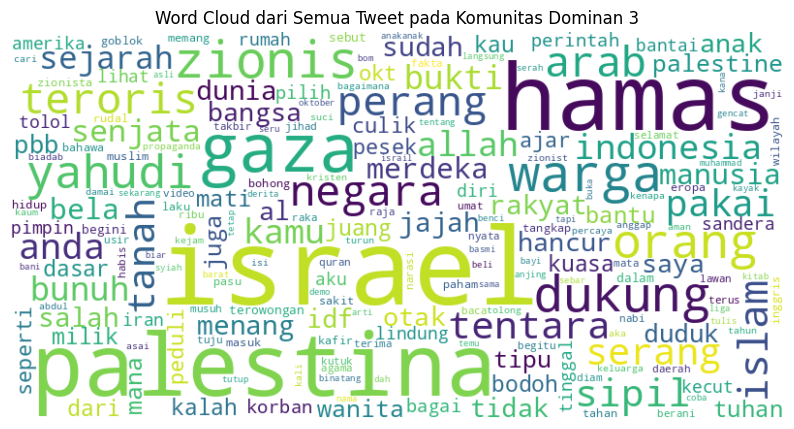

In [ ]:
# Menggabungkan kembali kata-kata dalam dokumen menjadi satu string
all_words2 = ' '.join(df_tokens_stemmed_joined2)

# Membuat word cloud
wordcloud2 = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(all_words2)

# Menampilkan word cloud dengan judul
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')

# Menambahkan judul pada word cloud
plt.title('Word Cloud dari Semua Tweet pada Komunitas Dominan 3', fontsize=12)

# Menampilkan plot
plt.show()

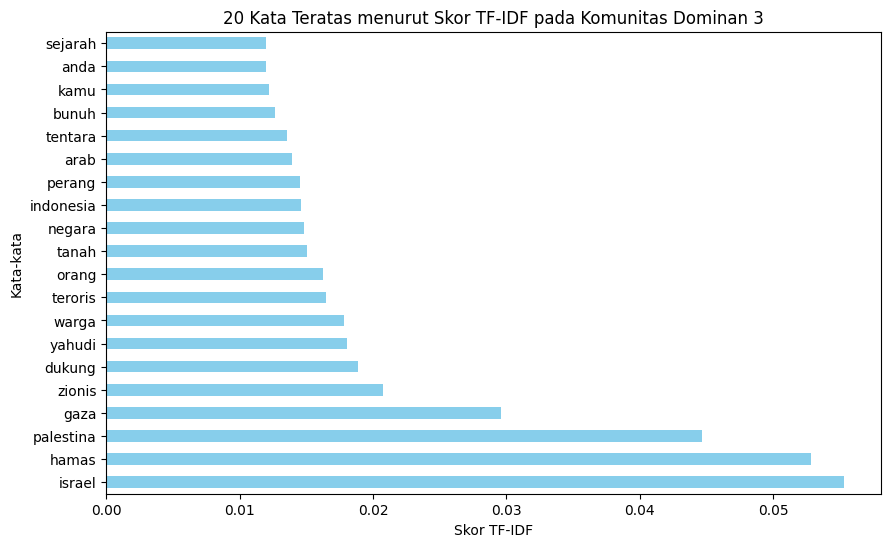

In [ ]:
# Menghitung rata-rata nilai TF-IDF untuk setiap kata
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Menampilkan 20 kata dengan nilai TF-IDF tertinggi
top_n = 20
plt.figure(figsize=(10, 6))
mean_tfidf.head(top_n).plot(kind='barh', color='skyblue') # Tukar ke 'barh' untuk horizontal
plt.title(f'{top_n} Kata Teratas menurut Skor TF-IDF pada Komunitas Dominan 3')
plt.ylabel('Kata-kata') # Tukar label sumbu
plt.xlabel('Skor TF-IDF') # Tukar label sumbu
plt.show()

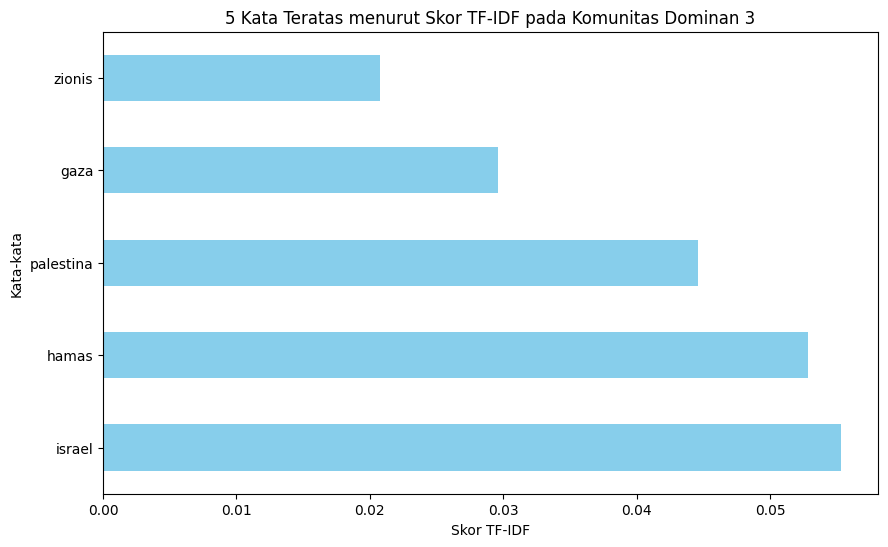

In [ ]:
# Menghitung rata-rata nilai TF-IDF untuk setiap kata
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Menampilkan 20 kata dengan nilai TF-IDF tertinggi
top_n = 5
plt.figure(figsize=(10, 6))
mean_tfidf.head(top_n).plot(kind='barh', color='skyblue') # Tukar ke 'barh' untuk horizontal
plt.title(f'{top_n} Kata Teratas menurut Skor TF-IDF pada Komunitas Dominan 3')
plt.ylabel('Kata-kata') # Tukar label sumbu
plt.xlabel('Skor TF-IDF') # Tukar label sumbu
plt.show()

## <center><font color="pink">Mengecek Kesesuaian Topik</font></center>

Dengan menampilkan tweet dari user berpengaruh di Cluster 2

In [ ]:
# Menampilkan 3 User dengan indegree teratas (User paling banyak dimention)
df_leiden[df_leiden['Cluster'] == 2].nlargest(3, 'indegree')[['Id', 'indegree']]

,Id,indegree
14,DeHoutman_id,25
24,SammiSoh,21
42,Kappa_2023,19


In [ ]:
# Menampilkan beberapa tweet yang me-mention user DeHoutman_id
pd.set_option('display.max_colwidth', None)
df_baru[df_baru['full_text'].str.contains('@DeHoutman_id')]['full_text'].head(5)

,full_text
363,@DeHoutman_id Umar merebut Palestina dari Romawi yg sudah menjajahnya selama beratus tahun bukan dari Yahudi belajar lagi ya sejarahnya masa fakta seumum ini kagak tahu? https://t.co/zKI66dfw03
712,@DeHoutman_id Diam saja jika tidak tau sejarah Jika anda siap dengan kebodohanmu tunggu waktunya kau akan binasa dengan kaum yahudi israel. Palestina tidak perna menjanjah atau membunuh tanpa alasan Israel lah yang menjanjah palestina bumi hanguskan israe
1222,@DeHoutman_id Wkwkwk yang buta sejarah kau tentang Zionis yahudi israel otak dungu kristen di palestina aja skeng lgi menderita gara2 zionis malahan dri dlu kau kristen indo dungu nya di pupuk
1628,@DeHoutman_id Hehehe.... Orang bebal... Siapa yg menyalib Yesus? Israel Siapa yg menuduh Yesus anak Haram? Israel. Makanya mrk meludahi klean https://t.co/jELTcbR3pG
1769,@DeHoutman_id Petinggi hamas suruh hidup tinggal ditengah2 rakyat palestina aja gk bakal mau apalagi disuruh perang lawan tentara israel jauh dari angan2 mrk. Kok jd teringat akan GAM dulu petingginya hasan tiro hidup sejahtera diswedia sana mau balik ace


In [ ]:
# Menampilkan beberapa tweet yang me-mention user SammiSoh
df_baru[df_baru['full_text'].str.contains('@SammiSoh')]['full_text'].head(5)

,full_text
629,@SammiSoh Orang gaza benci hamas itu BAGAIKAN orang nusantara benci pangeran Diponegoro bung Karno teuku umar keumalahayati https://t.co/ahKa7JAzcN
713,@SammiSoh sebelum hamas nyerang kemarin terjadi pencurian tanah palestina oleh israel buldoser nggusur dgn perlindungan moncong senjata IDF apakah kalian2 bereaksi? perasaanku sih kalian gak ada reaksi.
1017,@SammiSoh Karena negara arab sedang mengusahakan perdamaian dengan jalur diplomasi hamas tiba tiba perang apa itu bukan merusak usaha negara negara uni emirat arab selama ini.
1292,@SammiSoh Dibayar berapa jadi buzzer israel?
1324,@oktafian @TonyHutagalung4 @SammiSoh Londo ireng yang beragama warisan penjajah pasti pro israel ? Padahal Tuhanya aja dibunuh oleh israel ??? ANEH


In [ ]:
# Menampilkan beberapa tweet yang me-mention user Kappa_2023
df_baru[df_baru['full_text'].str.contains('@Kappa_2023')]['full_text'].head(5)

,full_text
2328,@JinNonik @LonenyDragon @dady_tri @Tatto26141368 @kopi_kretek @Wawan_74 @PribadiBales @Klabangijo @Kappa_2023 @Karsono12732862 @SontoJoko @MARQUEZ__93 @the3brothers2 @JochenJoy @Chokee72634552 @Valhallaah @Amran_bin_Ali @asasfuro @bayoubeka @DiposuroP @Yu
3760,@kevhunt_13 @bnsphrxyz @Kappa_2023 @T14N87 @ahmedasarlan @Valhallaah @SeventhMhd @penyebaracun @raindec1622 @arc_stray @bryan_chung09 @gajahgemblik @gggbxng Ketika Umat Islam Indonesia menyatakan Anti Israel maka oleh Wahid Institute akan dianggap sebagai
6435,@Kappa_2023 @agama_nusantara @mx00711 @_christing_ @Tita83079013 @AremaNita__ @duniamaya_29 @bnsphrxyz @sakkusaitna @debbieflavi @RefublikAteis @frank21blue @BayuAngora @spektrumku @silarakhito @Valhallaah @OmbakBanyu2 @PaijoKhentir @NamoAryatara @ahmedas
19163,@ajegilelu1 @JhontalJk @asasfuro @JinNonik @wenwenIp7 @Kappa_2023 @TitikHa50231063 @MelodiAsyik @YanFx_TRade @LonenyDragon @halo_lentera @perbowo @JokoPintar2 @the3brothers2 @AyaniMel @Uni_RancakBana @jarjitsinghai @Karsono12732862 @Alfatih007Mr @Arya_Sen
27473,Boss Hamas mulai ketar-ketir? @agama_nusantara @Tita83079013 @_christing_ @bnsphrxyz @sakkusaitna @debbieflavi @RefublikAteis @frank21blue @BayuAngora @spektrumku @silarakhito @Valhallaah @PaijoKhentir @iam_zelt @helenr1903 @NamoAryatara @ahmedasarlan @Kappa_2023


In [ ]:
# Menampilkan 3 User dengan outdegree teratas (User paling banyak me-mention)
df_leiden[df_leiden['Cluster'] == 2].nlargest(3, 'outdegree')[['Id', 'outdegree']]

,Id,outdegree
67,__anomali__,32
88,MarioInferno,30
42,Kappa_2023,28


In [ ]:
# Menampilkan tweet dari user __anomali__
pd.set_option('display.max_colwidth', None)
df_baru[df_baru['username'] == '__anomali__']['full_text'].head(5)

,full_text
3760,@kevhunt_13 @bnsphrxyz @Kappa_2023 @T14N87 @ahmedasarlan @Valhallaah @SeventhMhd @penyebaracun @raindec1622 @arc_stray @bryan_chung09 @gajahgemblik @gggbxng Ketika Umat Islam Indonesia menyatakan Anti Israel maka oleh Wahid Institute akan dianggap sebagai
4097,@SammiSoh STUPID kamu..@Sammisoh ..ketika seorang Palestina tak mampu menjelaskan entitas wilayahnya sebelum 1948 dijadikan ACUAN ? Coba kita tanya Golda Meir bekas PM Israel pemegang Passport Palestina https://t.co/0ckG96aS6G
4294,@SammiSoh Palestina adalah wilayah Kesultanan Ottoman yang kemudian beralih menjadi Protektorat Inggris BUKAN Tanah Tak Bertuan. Diatas wilayah Palestina hidup orang orang Arab Palestina dan Yahudi sejak ribuan tahun itulah REALITA nya... Masih NGEYEL @Sa
5862,Israel mematikan Akses Internet Gaza tetapi postingan-postingan dari Gaza tetap marak di Timeline. Israel SUDAH OMPONG belum juga 100 tahun berdiri Republik Zionist Israel insya Allah tak lama lagi musnah demi Perdamaian Seluruh Timur Tengah ditinggalkan penduduknya AMIN...
5876,@SammiSoh Cinta Negeri sedari kecil bukan hanya di Palestina tetapi juga di Russia @SammiSoh ... mempertahankan Eksistensi Bangsa Zionista lsrael boleh KETAR-KETIR lalu EXODUS kembali ke Eropa - Amerika. Tanah Palestina bukan wilayah aman buat mereka http


In [ ]:
# Menampilkan tweet dari user MarioInferno
df_baru[df_baru['username'] == 'MarioInferno']['full_text'].head(5)

,full_text
6760,@SammiSoh Penjajah bunuh rakyat kecil wkwkwk 2005 Israel sdh meninggalkan Gaza saat itulah Gaza mulai dikuasai Hamas proxy Syi'ah Iran (liat aja rudal Qassam mereka) termasuk milisi Hezbollah di Lebanon. Yg nyerang dulu siapa yang kalah siapa yg hilang wi
12887,@Arie_gin2 @anton_harjo @rizalMulachela @HeruCaturP @Reborn_Silence @muchlis_ar Tujuan anda cuma satu yaitu genosida satu etnis dari map jadi gak munafik langsung aja bilang as Khamenei Israel harus dihapus dari peta gentle suffering of Palestinian people
13258,@DeHoutman_id Ini masalahnya punya identitas ijin kerja ternyata bagian dari Hamas ditemukan dr kantong terrorist yg mati 7 Oktober bareng Captagonnya https://t.co/gajzSbW4hb
15922,@SammiSoh Israel gak akan sebrutal ini di Gaza jika tidak ada korban anak-anak gak perlu anak-anak Yahudi. Madrasah Arab dibom Hamas sampai ada korban anak-anak Arab Israel serangan darat akan tetap dilakukan Israel sebagai retaliation
16091,@Mundiwangi4 Saat bunuhin manula wanita dan anak-anak mereka dengan bangganya bertakbir saat tertangkap gini malah pipis dicelana. Islam madzhab apa sih yg ngajarkan bunuhin manula wanita (termasuk yg berhijab) dan anak-anak sambil Takbir? Dan herannya Su


In [ ]:
# Menampilkan tweet dari user Kappa_2023
df_baru[df_baru['username'] == 'Kappa_2023']['full_text'].head(5)

,full_text
919,@zoelfick Seharusnya pejuang Hamas cari medan perang Kurusetra pak. Duel jantan. Bukan sembunyi di rumah2 penduduk atau di masjid sehabis membantai warga sipil Israel di kampung halamannya.
11044,@AsbabulKop51425 Betul. Ntar damai trus mrk kirim roket lagi. Bunuh2in sipil Israel lagi dikemudian hari. Kan pemimpin Hamas sendiri yg bilang akan mengulangi lagi dan lagi ngeroket dan membunuh warga sipil Israel. Makanya harus perangi Hamas hingga tunta
13011,@Tita83079013 1. Biar tetap stay di Palestine sbg tameng hidup Hamas 2. Berharap negara2 kafir menerima mrk jadi pengungsi lalu mrk mainkan tugas mrk sbg pasukan Kuda Troya di negara kafir tsb dan menegakkan syariat Islam di sana.
24671,@HutahaeanAzhar @Sentjoko @Avolanza Ternyata benar kan Hamas menculik lalu menyandera bayi dan lansia dari rumah2 mrk saat merayakan hari raya Yahudi?? Tentunya setelah membunuh ortu mrk. Fakta biadab gini masih kamu bantah slim??
24695,@Sentjoko @PaijoKhentir @Avolanza Kalau ga dipuji2 nanti kerabatnya yg masih disandera akan dibunuh... Liciknya Hamas.
